In [2]:
from configparser import Interpolation
import os
import cv2
from tqdm import tqdm
#from demo.image_matting.colab.inference2 import run
import numpy as np
from collections import Counter
import argparse
import configparser
import matplotlib.pyplot as plt
import torchvision.transforms.functional as TF
from PIL import Image


def scale_contour(cnt, scale):
    try :
        M = cv2.moments(cnt)
        if M['m00'] == 0:
            cnt_scaled = cnt
        else :
            cx = int(M['m10']/M['m00'])
            cy = int(M['m01']/M['m00'])

            cnt_norm = cnt - [cx, cy]
            cnt_scaled = cnt_norm * scale
            cnt_scaled = cnt_scaled + [cx, cy]
            cnt_scaled = cnt_scaled.astype(np.int32)
    except :
        arr = []
        for i in range(len(cnt)):

            M = cv2.moments(cnt[i])
            if M['m00'] == 0:
                cnt_scaled = cnt[i]
            else :
                cx = int(M['m10']/M['m00'])
                cy = int(M['m01']/M['m00'])

                cnt_norm = cnt[i] - [cx, cy]
                cnt_scaled = cnt_norm * scale
                cnt_scaled = cnt_scaled + [cx, cy]
                cnt_scaled = cnt_scaled.astype(np.int32)
                arr.append(cnt_scaled)
        cnt_scaled = arr
    return cnt_scaled




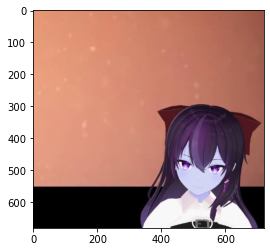

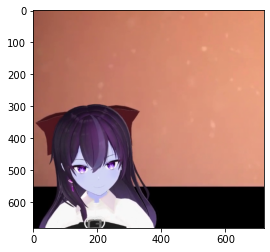

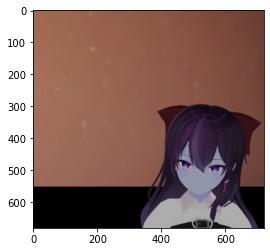

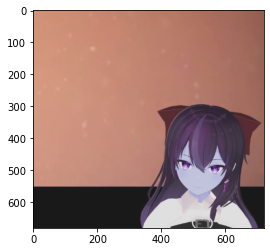

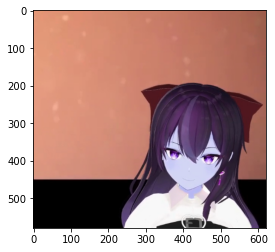

In [15]:
img = cv2.imread('/home/jini1114/git/data/dataset/data/r_cut_주르르.mp4/Images/7526.jpg')

pil_image = Image.fromarray(img)

flip_img = TF.hflip(pil_image)

bright_img=TF.adjust_brightness(pil_image,0.7)

cont_img=TF.adjust_contrast(pil_image,0.8)

crop_img = img[100:,100:]

In [2]:
txt = 'l_cut_ine.mp4'
txt[6:-4]

'ine'

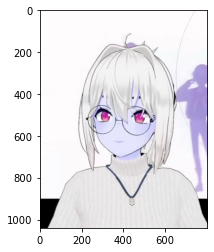

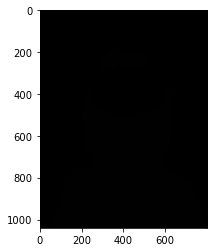

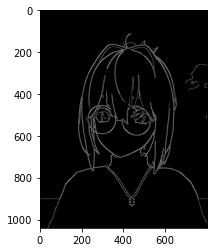

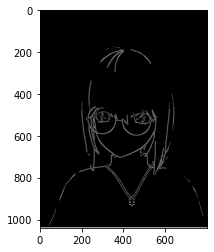

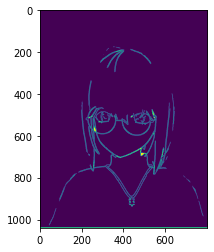

In [6]:
temp = cv2.imread('/home/jini1114/git/data/output/l_cut_ine.mp4/1000.jpg')
matte = cv2.imread('/home/jini1114/git/data/temp/l_cut_ine.mp4/1000.png')
seg = cv2.imread('/home/jini1114/git/data/segmentation/l_cut_ine.mp4/1000.png')

plt.imshow(temp,cmap='gray')
plt.show()

plt.imshow(matte,cmap='gray')
plt.show()

# Convert to graycsale
img_gray = cv2.cvtColor(temp, cv2.COLOR_BGR2GRAY)
# Blur the image for better edge detection

# Canny Edge Detection
edges = cv2.Canny(image=img_gray, threshold1=50, threshold2=200) # Canny Edge Detection
# Display Canny Edge Detection Image
plt.imshow(edges,cmap='gray')
plt.show()


foreground = cv2.multiply(edges, matte[:,:,0])
foreground[-3:,:] = 255
plt.imshow(foreground,cmap='gray')
plt.show()

res = cv2.findContours(foreground, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
contours = res[-2]
area = []
for i in range(len(contours)):
    area.append(cv2.contourArea(contours[i]))
idx = np.where(np.max(area) == area)[0][0]

blank = np.zeros(foreground.shape)
cv2.drawContours(blank, contours, contourIdx=-1, color=(255,255,255),thickness=-1)

plt.imshow(blank)
plt.show()

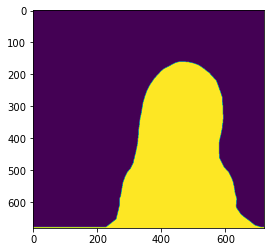

In [109]:
import alphashape

points = []
for contour in contours :
    for cnt in contour :
        points.append([cnt[0][0],cnt[0][1]])

alpha = 0.95 * alphashape.optimizealpha(points)
hull = alphashape.alphashape(points, alpha)
hull_pts = hull.exterior.coords.xy

alpha = np.zeros((len(hull_pts[0]),1,2))
for idx in range(len(hull_pts[0])):
    alpha[idx][0][0] = hull_pts[0][idx]
    alpha[idx][0][1] = hull_pts[1][idx]
alpha = alpha.astype(np.int32)

blank = np.zeros(foreground.shape)
cv2.drawContours(blank, [alpha], contourIdx=-1, color=(255,255,255),thickness=-1)
plt.imshow(blank)

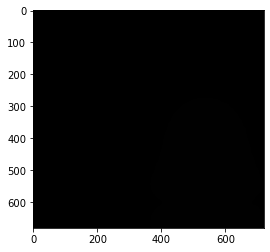

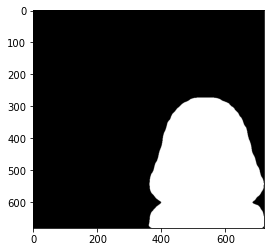

In [113]:
seg_dir = '/home/jini1114/git/data/segmentation/r_cut_viichan.mp4'
idx = 100
modnet = cv2.imread(os.path.join(seg_dir,'%d.png'%(idx)))
temp = modnet * 255
plt.imshow(temp)
plt.show()
gray = temp[:,:,0]
res = cv2.findContours(gray.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
contours = res[-2]
area = []
for i in range(len(contours)):
    area.append(cv2.contourArea(contours[i]))
idx = np.where(np.max(area)==area)[0][0]
cv2.drawContours(temp, contours, contourIdx=idx, color=(255,255,255),thickness=-1)
plt.imshow(temp)
plt.show()